# Лабораторная работа №2 по курсу "Методы машинного обучения"

# **ИУ5-21М Данилин М.С.**

- **Цель лабораторной работы**: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализация числовых признаков.

# Подключение библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ход работы

## Выбор и описание датасета

- Этот набор данных предоставляет полную информацию о поведении клиентов для типичной страницы туризма в социальных сетях. Датасет содержит в себе следующие поля:
    - UserID (PK) - удаляем
    - Taken_product - купил тур (да/нет)
    - Yearly_avg_view_on_travel_page - Среднегодовое количество просмотров пользователем любой страницы, связанной с путешествиями
    - preferred_device - Предпочтительное устройство для входа пользователя в систему
    - total_likes_on_outstation_checkin_given - Общее количество лайков, поставленных пользователем при регистрации вне станции за последний год
    - yearly_avg_Outstation_checkins - Среднее количество регистраций за пределами станции, выполненных пользователем
    - member_in_family - Общее количество членов семьи, упомянутых пользователем в учетной записи
    - preferred_location_type - Предпочтительный тип местоположения для перемещения пользователя
    - Yearly_avg_comment_on_travel_page - Среднегодовые комментарии пользователя на любой странице, связанной с путешествиями
    - total_likes_on_outofstation_checkin_received - Общее количество лайков, полученных пользователем при выезде за пределы станции за последний год
    - week_since_last_outstation_checkin - Количество недель с момента последнего обновления пользователем регистрации вне станции
    - following_company_page - Читает ли клиент страницу компании (Да или Нет)
    - montly_avg_comment_on_company_page - Среднее количество комментариев пользователя на странице компании в месяц
    - working_flag - работает или нет
    - travelling_network_rating - Рейтинг, указывающий, есть ли у пользователя близкие друзья, которые также любят путешествовать. 1 — высокий, 4 — самый низкий
    - Adult_flag - взрослый или нет
    - Daily_Avg_mins_spend_on_traveling_page - Среднее время, проведенное пользователем на странице путешествия компании

In [ ]:
# Импорт датасета
df = pd.read_csv('datasets/cust_beh.csv')

# Вывод первых 5 строк
df.head(5)

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [ ]:
# Используем только некоторые признаки
cols_filter = ['Taken_product', 'preferred_device', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page',
        'travelling_network_rating']
data = df[cols_filter]
data.head()

,Taken_product,preferred_device,Yearly_avg_view_on_travel_page,Yearly_avg_comment_on_travel_page,travelling_network_rating
0,Yes,iOS and Android,307.0,94.0,1
1,No,iOS,367.0,61.0,4
2,Yes,iOS and Android,277.0,92.0,2
3,No,iOS,247.0,56.0,3
4,No,iOS and Android,202.0,40.0,4


## Устранение пропусков в данных

In [ ]:
hdata = data
list(zip(hdata.columns, [i for i in data.dtypes]))

[('Taken_product', dtype('O')),
 ('preferred_device', dtype('O')),
 ('Yearly_avg_view_on_travel_page', dtype('float64')),
 ('Yearly_avg_comment_on_travel_page', dtype('float64')),
 ('travelling_network_rating', dtype('int64'))]

In [ ]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['preferred_device',
 'Yearly_avg_view_on_travel_page',
 'Yearly_avg_comment_on_travel_page']

In [ ]:
hdata.shape

(11770, 5)

In [ ]:
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('preferred_device', 53),
 ('Yearly_avg_view_on_travel_page', 581),
 ('Yearly_avg_comment_on_travel_page', 206)]

In [ ]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('preferred_device', 0.004502973661852166),
 ('Yearly_avg_view_on_travel_page', 0.04936278674596432),
 ('Yearly_avg_comment_on_travel_page', 0.01750212404418012)]

In [ ]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['preferred_device', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page']

In [ ]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(10956, 3)

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure(figsize=(18, 8))
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

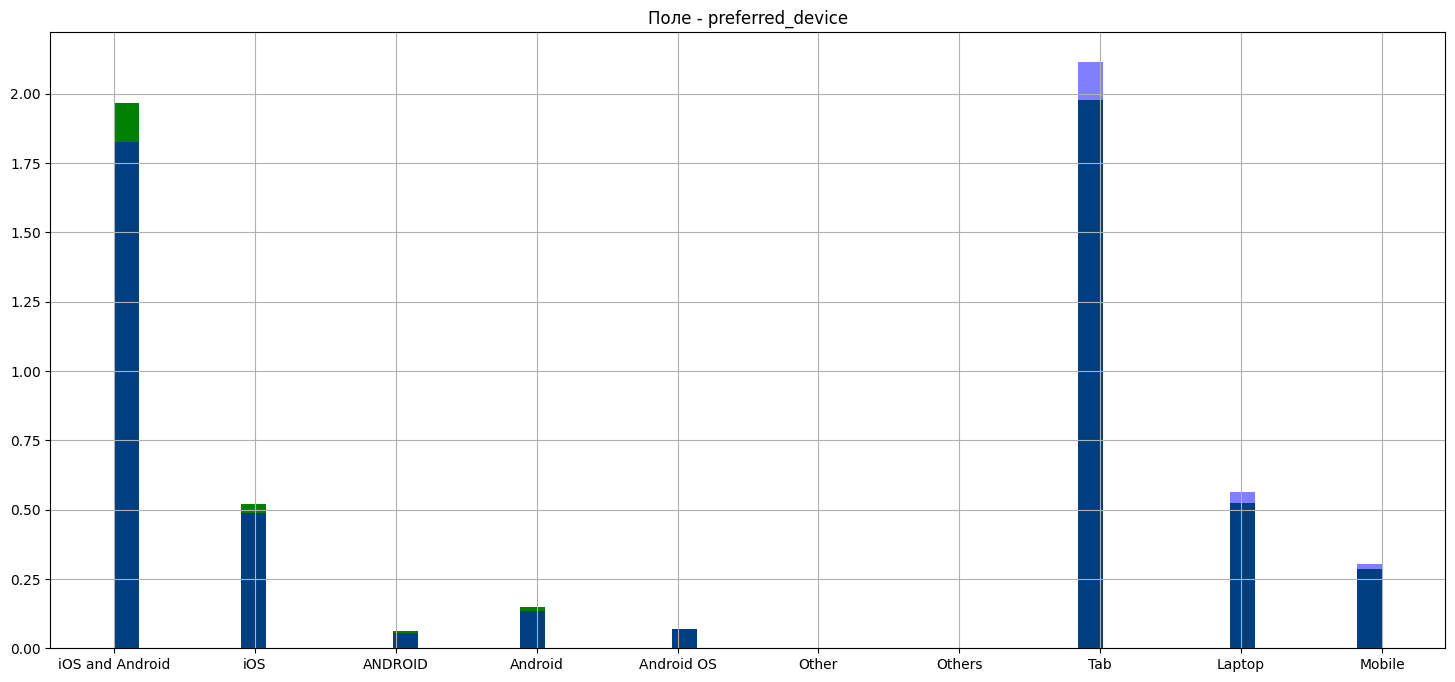

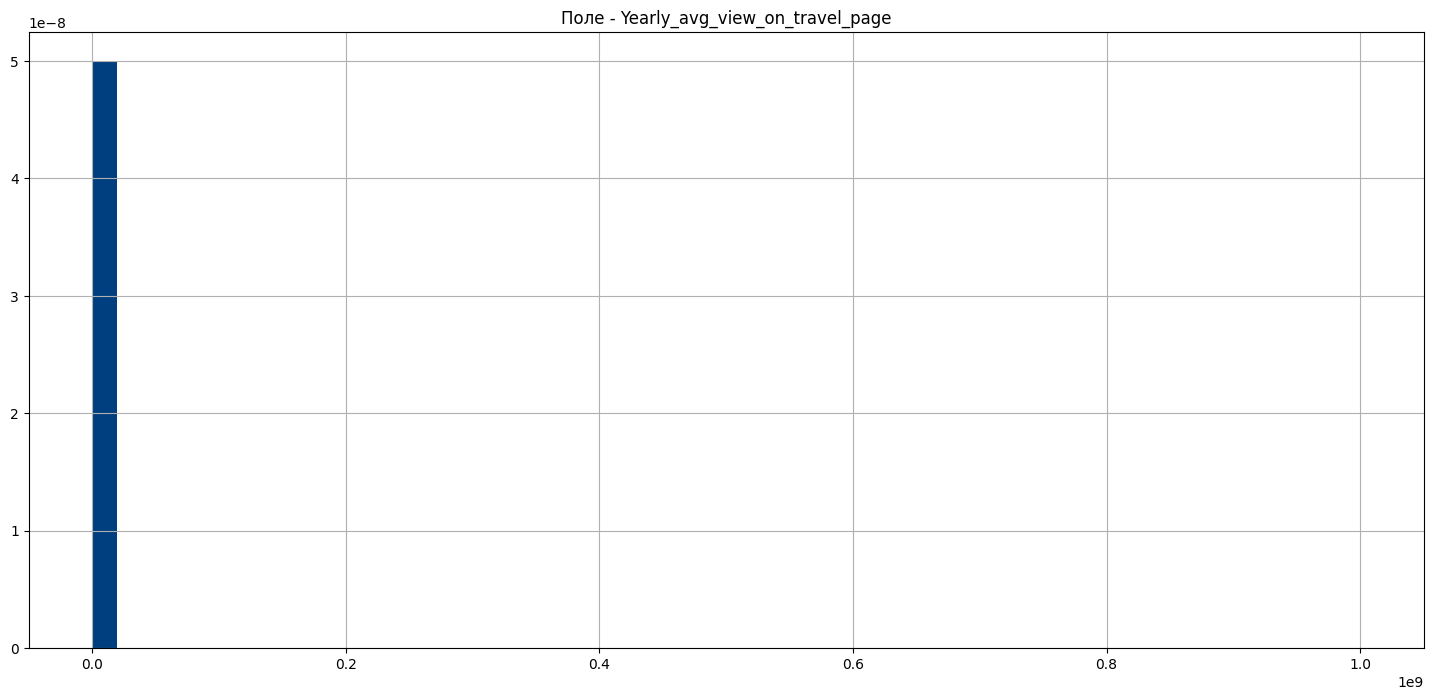

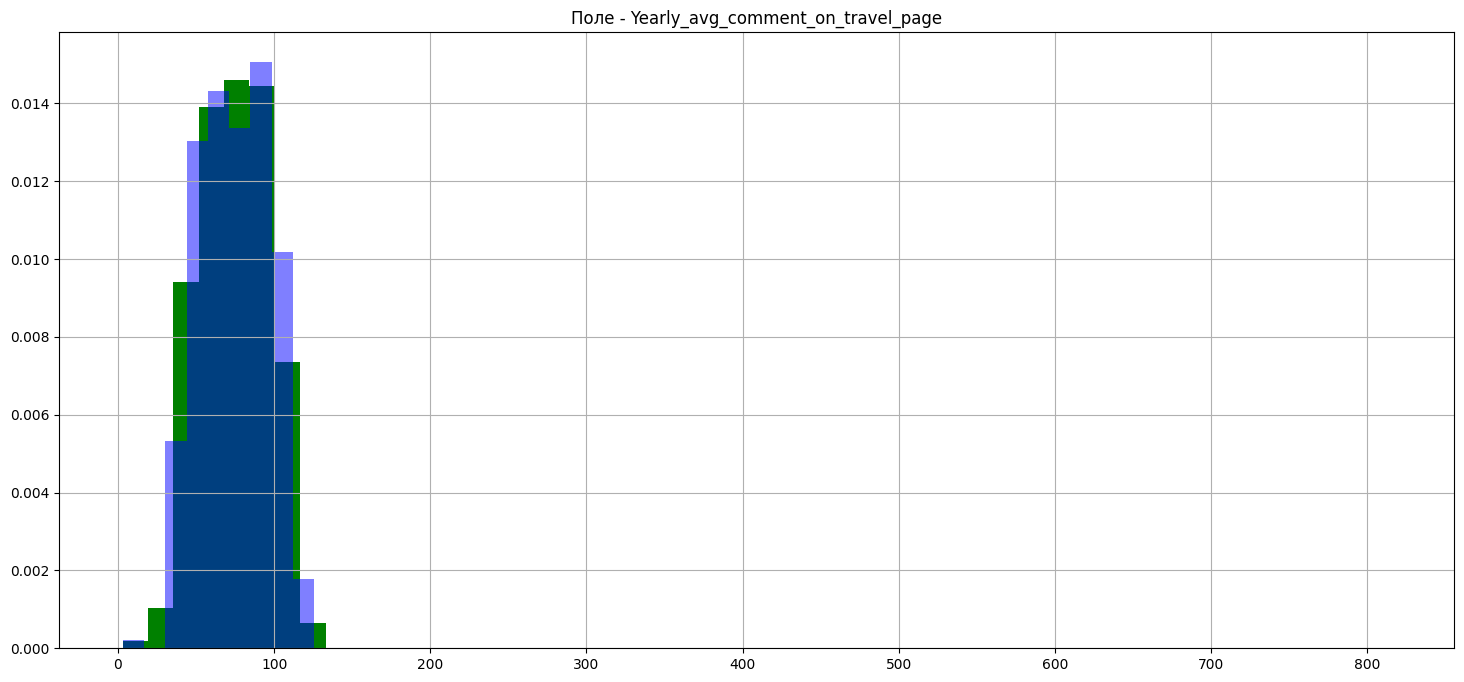

In [ ]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

## Кодирование категориальных признаков

- Проведём кодирование категорилального признака preferred_device с использованием метода "one-hot encoding".
- One-hot encoding предполагает, что значение категории заменяется на отдельную колонку, которая содержит бинарные значения.
- Преимущества:
    - Простота реализации.
    - Подходит для любых моделей, так как НЕ создает фиктивное отношение порядка между значениями.
- Недостатки:
    - Расширяется признаковое пространство.

In [ ]:
pd.get_dummies(data[['preferred_device']]).head()

,preferred_device_ANDROID,preferred_device_Android,preferred_device_Android OS,preferred_device_Laptop,preferred_device_Mobile,preferred_device_Other,preferred_device_Others,preferred_device_Tab,preferred_device_iOS,preferred_device_iOS and Android
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['preferred_device']], dummy_na=True).head()

,preferred_device_ANDROID,preferred_device_Android,preferred_device_Android OS,preferred_device_Laptop,preferred_device_Mobile,preferred_device_Other,preferred_device_Others,preferred_device_Tab,preferred_device_iOS,preferred_device_iOS and Android,preferred_device_nan
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False


## Нормализация числовых признаков

- Проведём нормализацию числовых признаков через использование межквартильного размаха
- Межквартильный размах IQR (interquartile range, IQR) - это разность третьего квартиля и первого квартиля:

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [ ]:
data.shape

(11770, 5)

In [ ]:
filtered_dataset = remove_outliers_iqr(data, 'Yearly_avg_view_on_travel_page')
filtered_dataset.shape

(11168, 5)